In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from wordcloud import WordCloud
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten
from tensorflow.keras.utils import plot_model
import matplotlib.ticker as ticker
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
train=pd.read_csv(r'C:\Users\user\Downloads\train_v2_drcat_02.csv\train_v2_drcat_02.csv')
train_1=pd.read_csv(r'C:\Users\user\Downloads\llm-detect-ai-generated-text\train_essays.csv')

In [3]:
train

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False
...,...,...,...,...,...
44863,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44864,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44865,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44866,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True


In [4]:
train_1

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


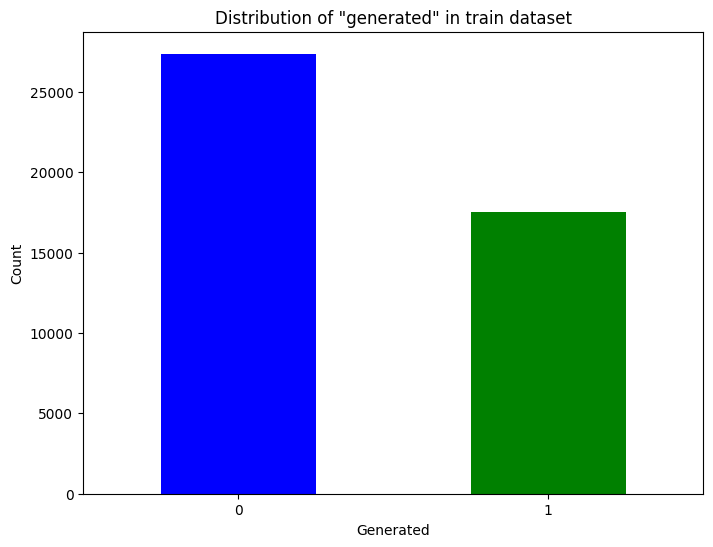

In [5]:
# Plot for train dataset
plt.figure(figsize=(8, 6))
train['label'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of "generated" in train dataset')
plt.xlabel('Generated')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

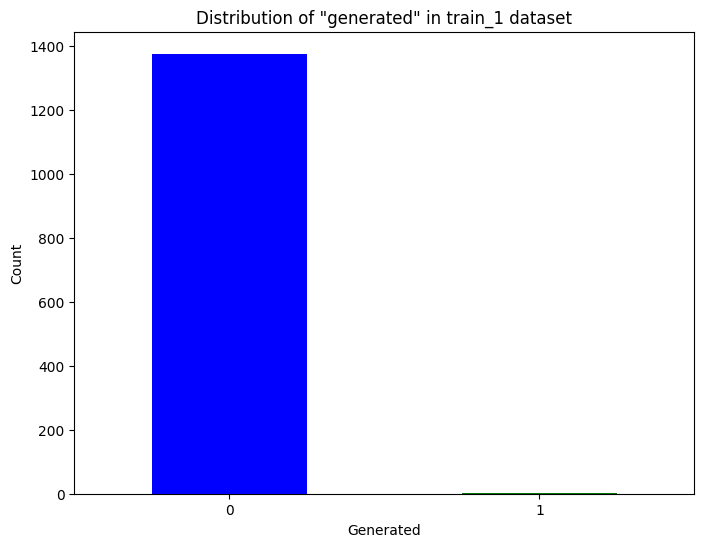

In [6]:
# Plot for train_1 dataset
plt.figure(figsize=(8, 6))
train_1['generated'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of "generated" in train_1 dataset')
plt.xlabel('Generated')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [7]:
# Selecting necessary columns from train dataset
train_selected = train[['text', 'label']].copy()

# Selecting necessary columns from train_1 dataset and renaming 'generated' to match the 'label' column
train_1_selected = train_1[['text', 'generated']].rename(columns={'generated': 'label'}).copy()

# Concatenating the selected columns from both datasets
combined_data = pd.concat([train_selected, train_1_selected], ignore_index=True)

# Displaying the combined data
print(combined_data)

                                                    text  label
0      Phones\n\nModern humans today are always on th...      0
1      This essay will explain if drivers should or s...      0
2      Driving while the use of cellular devices\n\nT...      0
3      Phones & Driving\n\nDrivers should not be able...      0
4      Cell Phone Operation While Driving\n\nThe abil...      0
...                                                  ...    ...
46241  There has been a fuss about the Elector Colleg...      0
46242  Limiting car usage has many advantages. Such a...      0
46243  There's a new trend that has been developing f...      0
46244  As we all know cars are a big part of our soci...      0
46245  Cars have been around since the 1800's and hav...      0

[46246 rows x 2 columns]


In [8]:
combined_data.columns

Index(['text', 'label'], dtype='object')

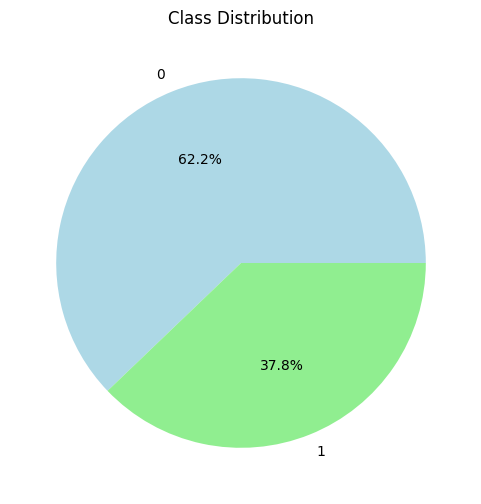

In [9]:
# Calculate class distribution
class_distribution = combined_data['label'].value_counts()

# Plotting the class distribution
plt.figure(figsize=(6, 6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Class Distribution')
plt.show()

In [10]:
# Checking for duplicates in combined_data
duplicate_rows = combined_data[combined_data.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)


# Checking for null values in combined_data
null_values = combined_data.isnull().sum()
print("\nNull Values:")
print(null_values)

# Dropping duplicates and null values from combined_data
combined_data.drop_duplicates(inplace=True)
combined_data.dropna(inplace=True)

# Confirming the removal of duplicates and null values
print("\nAfter Dropping:")
print(combined_data.shape)  # Check the shape after dropping

Duplicate Rows:
                                                    text  label
44868  Cars. Cars have been around since they became ...      0
44869  Transportation is a large necessity in most co...      0
44870  "America's love affair with it's vehicles seem...      0
44871  How often do you ride in a car? Do you drive a...      0
44872  Cars are a wonderful thing. They are perhaps o...      0
...                                                  ...    ...
46241  There has been a fuss about the Elector Colleg...      0
46242  Limiting car usage has many advantages. Such a...      0
46243  There's a new trend that has been developing f...      0
46244  As we all know cars are a big part of our soci...      0
46245  Cars have been around since the 1800's and hav...      0

[1378 rows x 2 columns]

Null Values:
text     0
label    0
dtype: int64

After Dropping:
(44868, 2)


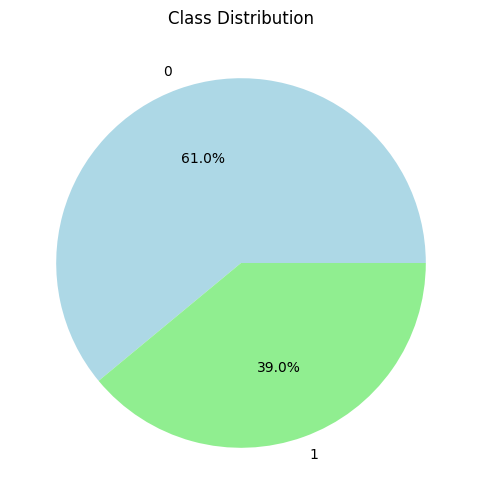

In [11]:
# Calculate class distribution
class_distribution = combined_data['label'].value_counts()

# Plotting the class distribution
plt.figure(figsize=(6, 6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Class Distribution')
plt.show()

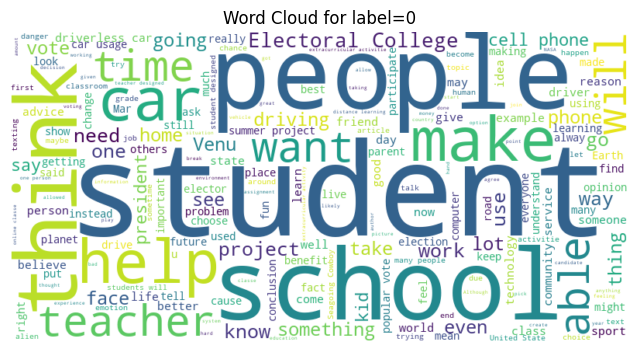

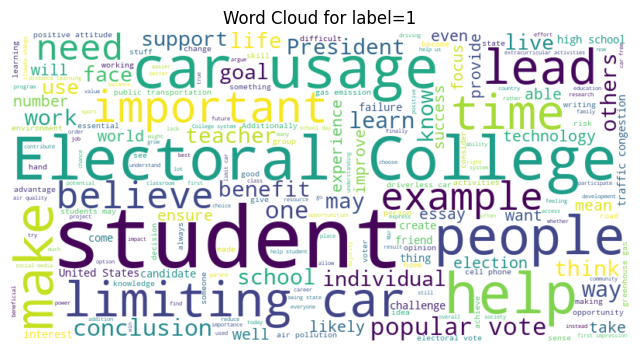

In [12]:
# Filter the combined data based on label values
label_0_text = ' '.join(combined_data[combined_data['label'] == 0]['text'])
label_1_text = ' '.join(combined_data[combined_data['label'] == 1]['text'])

# Generate word clouds
wordcloud_0 = WordCloud(width=800, height=400, background_color='white').generate(label_0_text)
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate(label_1_text)


# Plotting word cloud for label=0
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.title('Word Cloud for label=0')
plt.axis('off')
plt.show()

# Plotting word cloud for label=1
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.title('Word Cloud for label=1')
plt.axis('off')
plt.show()

In [13]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Tokenize and create TF-IDF vectors for the 'text' column of the combined dataset
tfidf_vectors = tfidf_vectorizer.fit_transform(combined_data['text'])

# Convert TF-IDF vectors to a DataFrame for easy analysis
tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df.head())

    00       000   10  100   11  114  118   12   13   14  ...      your  \
0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
1  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.193019   
2  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
3  0.0  0.060816  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
4  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   

   yours  yourself  youth  youtube  zip  zone  zones  zoos  zygomatic  
0    0.0       0.0    0.0      0.0  0.0   0.0    0.0   0.0        0.0  
1    0.0       0.0    0.0      0.0  0.0   0.0    0.0   0.0        0.0  
2    0.0       0.0    0.0      0.0  0.0   0.0    0.0   0.0        0.0  
3    0.0       0.0    0.0      0.0  0.0   0.0    0.0   0.0        0.0  
4    0.0       0.0    0.0      0.0  0.0   0.0    0.0   0.0        0.0  

[5 rows x 5000 columns]


In [14]:
# Split the data into training and testing sets
X = tfidf_df.values  # Features (TF-IDF vectors)
y = combined_data['label'].values  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Encode target labels (0 and 1) using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [16]:
# Build a simple neural network model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
], name='fully_connected_model')

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\user\myenv\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "fully_connected_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │       2,560,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,634,497 (10.05 MB)

 Trainable params: 2,634,497 (10.05 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

Epoch 1/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 77s 63ms/step - accuracy: 0.9311 - loss: 0.1347 - val_accuracy: 0.9954 - val_loss: 0.0160
Epoch 2/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 68s 60ms/step - accuracy: 0.9975 - loss: 0.0092 - val_accuracy: 0.9935 - val_loss: 0.0202
Epoch 3/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 80s 58ms/step - accuracy: 0.9983 - loss: 0.0063 - val_accuracy: 0.9940 - val_loss: 0.0231
Epoch 4/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 61s 54ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 0.9950 - val_loss: 0.0238
Epoch 5/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 61s 54ms/step - accuracy: 0.9993 - loss: 0.0022 - val_accuracy: 0.9950 - val_loss: 0.0392
Epoch 6/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 68s 61ms/step - accuracy: 0.9991 - loss: 0.0034 - val_accuracy: 0.9939 - val_loss: 0.0394
Epoch 7/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 64s 57ms/step - accuracy: 0.9988 - loss: 0.0023 - val_accuracy: 0.9943 - val_loss: 0.0309
Epoch 8/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 61s 54ms/step - accuracy: 0.9995 -

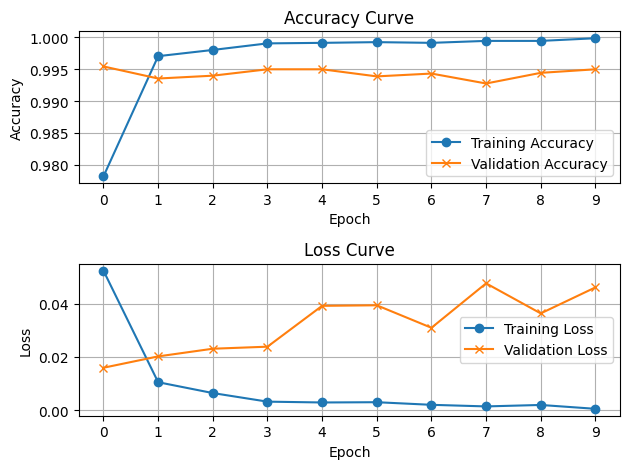

In [19]:
# Define empty lists to store accuracy and loss values
train_loss = []
train_accuracy = []
val_loss = []
val_accuracy = []

# Extract accuracy and loss values from the history object
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Create a grid layout for plots
fig, axs = plt.subplots(2, 1)

# Plotting the accuracy
axs[0].plot(train_accuracy, marker='o', label='Training Accuracy')
axs[0].plot(val_accuracy, marker='x', label='Validation Accuracy')
axs[0].set_title('Accuracy Curve')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)
axs[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Plotting the loss
axs[1].plot(train_loss, marker='o', label='Training Loss')
axs[1].plot(val_loss, marker='x', label='Validation Loss')
axs[1].set_title('Loss Curve')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)
axs[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Display the plots
plt.tight_layout()
plt.show()

In [20]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Accuracy: {test_accuracy:.4f}')

281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9945 - loss: 0.0567
Test Accuracy: 0.9950


In [21]:
preds=model.predict(X_test)
preds

281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[1.0000000e+00],
       [7.6259711e-14],
       [1.0000000e+00],
       ...,
       [1.0000000e+00],
       [5.4739314e-15],
       [1.0525117e-20]], dtype=float32)

281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9945 - loss: 0.0567
Test Accuracy: 0.9950
281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


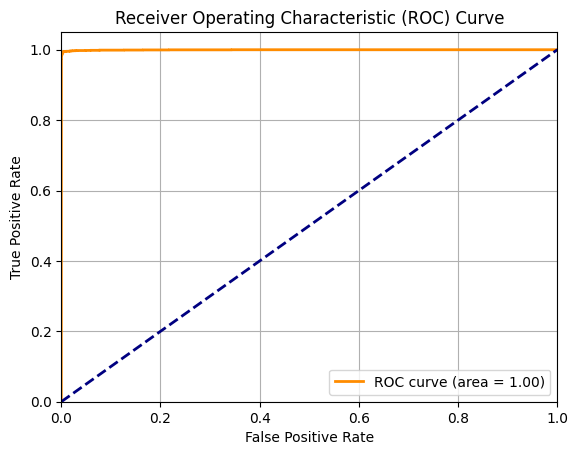

In [22]:
# Evaluate the model on the test set (assuming 'model' is your trained model)
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Obtain predictions on the test set
y_pred_proba = model.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [23]:
# Convert probabilities to class labels
y_pred = (y_pred_proba > 0.5).astype(int)  # Example threshold of 0.5, adjust as needed

# Generate classification report
report = classification_report(y_test_encoded, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5481
           1       1.00      0.99      0.99      3493

    accuracy                           0.99      8974
   macro avg       1.00      0.99      0.99      8974
weighted avg       0.99      0.99      0.99      8974



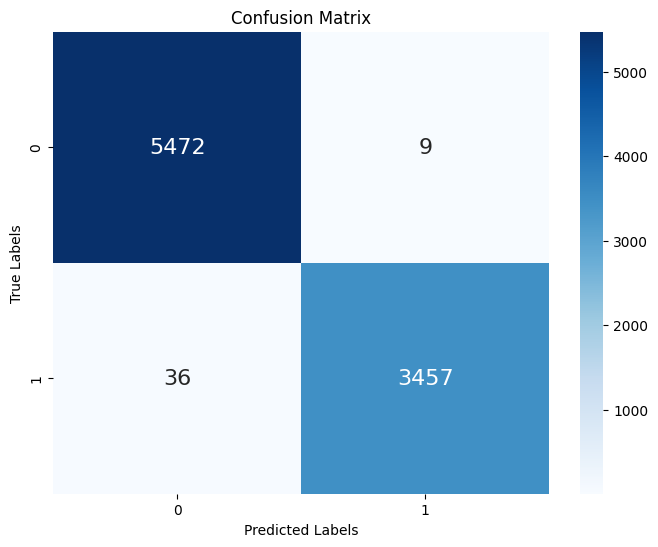

In [24]:
# Generate confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()